# Capstone Project - Accident Severity Prediction

#### Applied Data Science Project By Coursera

### Table of Contents
- Introduction
- Data Undersatnding
- Methodolgy
- Results and Discussion
- Conclusion

## Introduction: Business Problem

There are a lot of accidents which can be avoided by making people aware of certain accident prone areas. So, to reduce the frequency of vehicle collisions, an alogorithm or a model must be developed to predict the severity of an accident given the current weather, road condtions, street lights conditions. By doing so we can alert the drivers before hand so as to be more carefull and drive accordingly if the model predicts high severity. Hence, reducing the frequency of accidents in the community and saving the lives of people. This model targets all the people in the community.

## Data Understanding

The dataset we will be using contains of many instances of collisions under different situations. The target variable in our dataset is severity code. The predicted value of severity code will help us determine the areas which will be more accident prone on the day. The model will predict the target with the help of features that are in the dataset. The features available are Light conditions, weather conditions, Road conditions and many more. The dataset has 37 columns or featues of which we will decide the relevant features and build our model on these features.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [26]:
df.shape

(194673, 38)

In [27]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

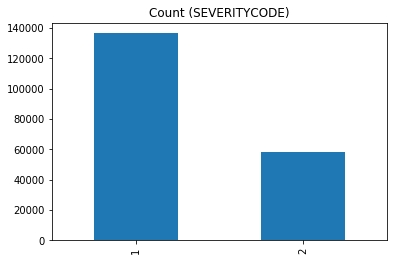

In [28]:
df['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (SEVERITYCODE)')

###### We observe that the data is imbalanced. In this section we will work with imbalanced data and in the next we will sample and work with balanced data and observe the difference.

In [29]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [30]:
# We observe that SPEEDING has a lot of values as zeros so despite it being an important feature we will drop it from our features.
df.drop(["SPEEDING"], axis = 1, inplace=True)


##### The features that are important and relevant for our prediction are ROADCOND, LIGHTCOND, WEATHER. So, we will build our models with these features. 

In [31]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [32]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [33]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

### Methodology

In [34]:
#Removing the irrelevant values from our features

df = df[df['ROADCOND']!= 'Unknown']
df = df[df['ROADCOND']!= 'Other']
df = df[df['LIGHTCOND']!= 'Unknown']
df = df[df['LIGHTCOND']!= 'Other']
df = df[df['WEATHER']!= 'Unknown']
df = df[df['WEATHER']!= 'Other']
df.shape


(175216, 37)

In [35]:
#One hot encoding for the fetaure "ROADCOND"
df['ROADCOND'].replace('Dry', 0, inplace=True)
df['ROADCOND'].replace('Wet', 2, inplace=True)
df['ROADCOND'].replace('Ice', 2, inplace=True)
df['ROADCOND'].replace('Snow/Slush', 1, inplace=True)
df['ROADCOND'].replace('Standing Water', 2, inplace=True)
df['ROADCOND'].replace('Sand/Mud/Dirt', 1, inplace=True)
df['ROADCOND'].replace('Oil', 2, inplace=True)

In [36]:
#One hot encoding for the fetaure "LIGHTCOND"
df['LIGHTCOND'].replace('Daylight', 0, inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights On', 1, inplace=True)
df['LIGHTCOND'].replace('Dusk', 1, inplace=True)
df['LIGHTCOND'].replace('Dawn', 1, inplace=True)
df['LIGHTCOND'].replace('Dark - No Street Lights', 2, inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights Off', 2, inplace=True)
df['LIGHTCOND'].replace('Dark - Unknown Lighting', 2, inplace=True)

In [37]:
#One hot encoding for the fetaure "WEATHER"
df['WEATHER'].replace(to_replace = ['Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,3,1,3,2,3,2,2,1] , inplace=True)


In [38]:
#Dropping the null values in the columns or features that we will use from the dataframe
df.dropna(subset=['ROADCOND','LIGHTCOND','WEATHER'], inplace=True)
df.shape

(169957, 37)

In [39]:
df['ROADCOND'].value_counts()

0.0    121490
2.0     47569
1.0       898
Name: ROADCOND, dtype: int64

In [40]:
df['ROADCOND'].value_counts()

0.0    121490
2.0     47569
1.0       898
Name: ROADCOND, dtype: int64

In [41]:
df.shape

(169957, 37)

In [42]:
x = df[['ROADCOND','LIGHTCOND','WEATHER']]
y = df['SEVERITYCODE']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train.shape

(127467, 3)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[28869     0]
 [13621     0]]
              precision    recall  f1-score   support

           1       0.68      1.00      0.81     28869
           2       0.00      0.00      0.00     13621

   micro avg       0.68      0.68      0.68     42490
   macro avg       0.34      0.50      0.40     42490
weighted avg       0.46      0.68      0.55     42490

0.6794304542245234


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [48]:
conf_rfc = confusion_matrix(y_test, y_pred)
print(conf_rfc)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[28869     0]
 [13621     0]]
              precision    recall  f1-score   support

           1       0.68      1.00      0.81     28869
           2       0.00      0.00      0.00     13621

   micro avg       0.68      0.68      0.68     42490
   macro avg       0.34      0.50      0.40     42490
weighted avg       0.46      0.68      0.55     42490

0.6794304542245234


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [50]:
conf_lr = confusion_matrix(y_test, y_pred)
print(conf_lr)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[28869     0]
 [13621     0]]
              precision    recall  f1-score   support

           1       0.68      1.00      0.81     28869
           2       0.00      0.00      0.00     13621

   micro avg       0.68      0.68      0.68     42490
   macro avg       0.34      0.50      0.40     42490
weighted avg       0.46      0.68      0.55     42490

0.6794304542245234


In [51]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf')
clf_svm.fit(x_train,y_train)
y_pred = clf_svm.predict(x_test)

In [52]:
conf_svm = confusion_matrix(y_test, y_pred)
print(conf_svm)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[28869     0]
 [13621     0]]
              precision    recall  f1-score   support

           1       0.68      1.00      0.81     28869
           2       0.00      0.00      0.00     13621

   micro avg       0.68      0.68      0.68     42490
   macro avg       0.34      0.50      0.40     42490
weighted avg       0.46      0.68      0.55     42490

0.6794304542245234


In [53]:
from sklearn.neighbors import KNeighborsClassifier
k = 12
scores = np.zeros((k-1))
for n in range(1,k):
    clf_knn = KNeighborsClassifier()
    clf_knn.fit(x_train, y_train)
    y_pred = clf_knn.predict(x_test)
    scores[n-1] = accuracy_score(y_pred, y_test)
scores

array([0.65740174, 0.65740174, 0.65740174, 0.65740174, 0.65740174,
       0.65740174, 0.65740174, 0.65740174, 0.65740174, 0.65740174,
       0.65740174])

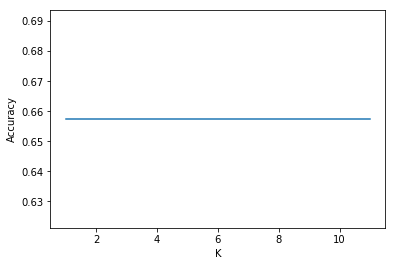

In [54]:
plt.plot(range(1,k),scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [55]:
print("The best k =", scores.argmax()+1 )

The best k = 1


In [56]:
clf_knn = KNeighborsClassifier(n_neighbors= scores.argmax()+1)
clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_test)

In [57]:
conf_knn = confusion_matrix(y_test, y_pred)
print(conf_rfc)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[28869     0]
 [13621     0]]
              precision    recall  f1-score   support

           1       0.67      0.82      0.74     28869
           2       0.29      0.15      0.20     13621

   micro avg       0.61      0.61      0.61     42490
   macro avg       0.48      0.49      0.47     42490
weighted avg       0.55      0.61      0.57     42490

0.6064485761355614


### Here we will balance the data and then build our models as done with the imbalanced data in the above section

In [58]:
df_test = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [59]:
df_test.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [60]:
test1 = ['SEVERITYCODE','ROADCOND','LIGHTCOND','WEATHER']
df_test1 = df_test[test1]
df_test1.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [61]:
df_test1.shape

(194673, 4)

In [62]:
df_test1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [63]:
df_test1 = df_test1[df_test1['ROADCOND']!= 'Unknown']
df_test1 = df_test1[df_test1['ROADCOND']!= 'Other']
df_test1 = df_test1[df_test1['LIGHTCOND']!= 'Unknown']
df_test1 = df_test1[df_test1['LIGHTCOND']!= 'Other']
df_test1 = df_test1[df_test1['WEATHER']!= 'Unknown']
df_test1 = df_test1[df_test1['WEATHER']!= 'Other']
df_test1.shape

(175216, 4)

In [64]:
df_test1['LIGHTCOND'].replace('Daylight', 0, inplace=True)
df_test1['LIGHTCOND'].replace('Dark - Street Lights On', 1, inplace=True)
df_test1['LIGHTCOND'].replace('Dusk', 1, inplace=True)
df_test1['LIGHTCOND'].replace('Dawn', 1, inplace=True)
df_test1['LIGHTCOND'].replace('Dark - No Street Lights', 2, inplace=True)
df_test1['LIGHTCOND'].replace('Dark - Street Lights Off', 2, inplace=True)
df_test1['LIGHTCOND'].replace('Dark - Unknown Lighting', 2, inplace=True)
df_test1.shape

(175216, 4)

In [65]:
df_test1['ROADCOND'].replace('Dry', 0, inplace=True)
df_test1['ROADCOND'].replace('Wet', 2, inplace=True)
df_test1['ROADCOND'].replace('Ice', 2, inplace=True)
df_test1['ROADCOND'].replace('Snow/Slush', 1, inplace=True)
df_test1['ROADCOND'].replace('Standing Water', 2, inplace=True)
df_test1['ROADCOND'].replace('Sand/Mud/Dirt', 1, inplace=True)
df_test1['ROADCOND'].replace('Oil', 2, inplace=True)

In [66]:
df_test1['WEATHER'].replace(to_replace = ['Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,3,1,3,2,3,2,2,1] , inplace=True)

In [67]:
df_test1.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,2.0,0.0,1.0
1,1,2.0,1.0,3.0
2,1,0.0,0.0,1.0
3,1,0.0,0.0,0.0
4,2,2.0,0.0,3.0


In [68]:
df_test1.dropna(subset=['ROADCOND','LIGHTCOND','WEATHER'], inplace=True)
df_test1.shape

(169957, 4)

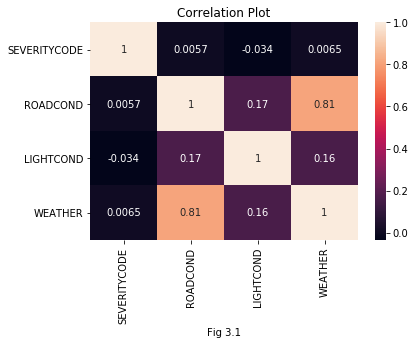

In [69]:
corr_mat = df_test1.corr()
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Plot")
plt.xlabel("Fig 3.1")
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
x = df_test1[['ROADCOND','LIGHTCOND','WEATHER']]
y = df_test1['SEVERITYCODE']
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)

(127467, 3)
(42490, 3)


### Random Under Sampling

In [71]:
count_class_1, count_class_2 = df_test1['SEVERITYCODE'].value_counts()
df_class_1 = df_test1[df_test1['SEVERITYCODE'] == 1]
df_class_2 = df_test1[df_test1['SEVERITYCODE'] == 2]

In [72]:
df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_1_under, df_class_2], axis=0)

print('Random under-sampling:')
print(df_test_under['SEVERITYCODE'].value_counts())

Random under-sampling:
2    55683
1    55683
Name: SEVERITYCODE, dtype: int64


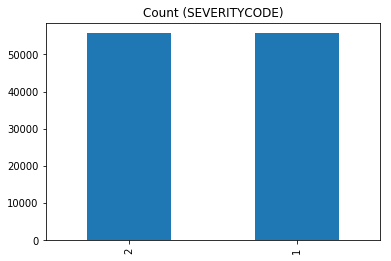

In [73]:
df_test_under['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (SEVERITYCODE)');

In [74]:
df_test_under.shape

(111366, 4)

In [75]:
df_test_under.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
76025,1,2.0,1.0,0.0
36812,1,2.0,1.0,3.0
151343,1,0.0,1.0,0.0
80586,1,2.0,1.0,3.0
62665,1,0.0,0.0,0.0


In [76]:
df_test_under = df_test_under.sample(frac=1)
df_test_under.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
28122,1,0.0,0.0,0.0
47745,2,2.0,1.0,3.0
152323,2,2.0,0.0,1.0
23730,1,0.0,0.0,0.0
54147,1,0.0,0.0,0.0


In [77]:
df_test_under['SEVERITYCODE'].value_counts()

2    55683
1    55683
Name: SEVERITYCODE, dtype: int64

In [78]:
X = df_test_under[['ROADCOND','LIGHTCOND','WEATHER']]
Y = df_test_under['SEVERITYCODE']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [79]:
X_train.shape

(83524, 3)

In [80]:
#Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [81]:
conf_dt = confusion_matrix(Y_test, y_pred)
print(conf_dt)
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[ 3597 10149]
 [ 3123 10973]]
              precision    recall  f1-score   support

           1       0.54      0.26      0.35     13746
           2       0.52      0.78      0.62     14096

   micro avg       0.52      0.52      0.52     27842
   macro avg       0.53      0.52      0.49     27842
weighted avg       0.53      0.52      0.49     27842

0.5233101070325408


In [82]:
#KNeighborsClassifier
k=12
scores = np.zeros((k-1))
for n in range(1,k):
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(X_train, Y_train)
    y_pred = clf_knn.predict(X_test)
    scores[n-1] = accuracy_score(Y_test, y_pred)
scores

array([0.4855973 , 0.48595647, 0.48344228, 0.48556138, 0.48900941,
       0.49296028, 0.49087709, 0.49331945, 0.49346311, 0.49482796,
       0.49349903])

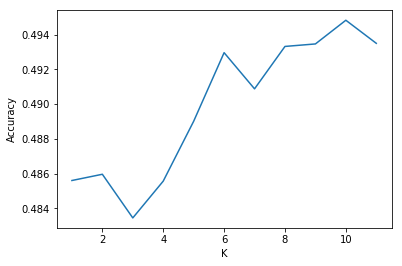

In [83]:
plt.plot(range(1,k),scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [84]:
print("The best k =", scores.argmax()+1 )

The best k = 10


In [85]:
clf_knn = KNeighborsClassifier(n_neighbors= scores.argmax()+1)
clf_knn.fit(X_train, Y_train)
y_pred = clf_knn.predict(X_test)


In [86]:
conf_knn = confusion_matrix(Y_test, y_pred)
print(conf_knn)
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[11965  1781]
 [12284  1812]]
              precision    recall  f1-score   support

           1       0.49      0.87      0.63     13746
           2       0.50      0.13      0.20     14096

   micro avg       0.49      0.49      0.49     27842
   macro avg       0.50      0.50      0.42     27842
weighted avg       0.50      0.49      0.41     27842

0.49482795776165506


In [108]:
#Random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

In [109]:
conf_rfc = confusion_matrix(Y_test, y_pred)
print(conf_rfc)
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[ 3597 10149]
 [ 3123 10973]]
              precision    recall  f1-score   support

           1       0.54      0.26      0.35     13746
           2       0.52      0.78      0.62     14096

   micro avg       0.52      0.52      0.52     27842
   macro avg       0.53      0.52      0.49     27842
weighted avg       0.53      0.52      0.49     27842

0.5233101070325408


In [89]:
#Support Vector Machine 
clf_svc = SVC(kernel='rbf')
clf_svc.fit(X_train, Y_train)
y_pred = clf_svc.predict(X_test)

In [90]:
conf_svc = confusion_matrix(Y_test, y_pred)
print(conf_svc)
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[ 3623 10123]
 [ 3151 10945]]
              precision    recall  f1-score   support

           1       0.53      0.26      0.35     13746
           2       0.52      0.78      0.62     14096

   micro avg       0.52      0.52      0.52     27842
   macro avg       0.53      0.52      0.49     27842
weighted avg       0.53      0.52      0.49     27842

0.5232382731125638


### Random Over Sampling

In [91]:
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_2_over], axis=0)

print('Random over-sampling:')
print(df_test_over['SEVERITYCODE'].value_counts())

Random over-sampling:
2    114274
1    114274
Name: SEVERITYCODE, dtype: int64


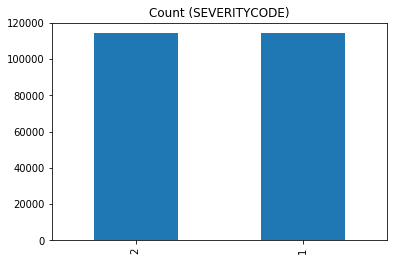

In [92]:
df_test_over['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count (SEVERITYCODE)');

In [93]:
df_test_over['SEVERITYCODE'].value_counts()

2    114274
1    114274
Name: SEVERITYCODE, dtype: int64

In [94]:
x_os = df_test_over[['ROADCOND','LIGHTCOND','WEATHER']]
y_os = df_test_over['SEVERITYCODE']
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os)
print(x_train.shape)
print(x_test.shape)

(171411, 3)
(57137, 3)


In [95]:
#Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [96]:
conf_dt = confusion_matrix(y_test, y_pred)
print(conf_dt)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 7627 20951]
 [ 6469 22090]]
              precision    recall  f1-score   support

           1       0.54      0.27      0.36     28578
           2       0.51      0.77      0.62     28559

   micro avg       0.52      0.52      0.52     57137
   macro avg       0.53      0.52      0.49     57137
weighted avg       0.53      0.52      0.49     57137

0.5201008103330591


In [97]:
#RandomForest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [98]:
conf_rfc = confusion_matrix(y_test, y_pred)
print(conf_rfc)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 7629 20949]
 [ 6469 22090]]
              precision    recall  f1-score   support

           1       0.54      0.27      0.36     28578
           2       0.51      0.77      0.62     28559

   micro avg       0.52      0.52      0.52     57137
   macro avg       0.53      0.52      0.49     57137
weighted avg       0.53      0.52      0.49     57137

0.5201358139209269


In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [100]:
conf_lr = confusion_matrix(y_test, y_pred)
print(conf_lr)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[10065 18513]
 [ 9071 19488]]
              precision    recall  f1-score   support

           1       0.53      0.35      0.42     28578
           2       0.51      0.68      0.59     28559

   micro avg       0.52      0.52      0.52     57137
   macro avg       0.52      0.52      0.50     57137
weighted avg       0.52      0.52      0.50     57137

0.5172305161279032


In [101]:
# KNeighborsClassifier
k=12
scores = np.zeros((k-1))
for n in range(1,k):
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(x_train, y_train)
    y_pred = clf_knn.predict(x_test)
    scores[n-1] = accuracy_score(y_test, y_pred)
scores

array([0.50333409, 0.50476924, 0.50172393, 0.50487425, 0.50457672,
       0.50455922, 0.50706197, 0.50788456, 0.50774454, 0.50765703,
       0.50723699])

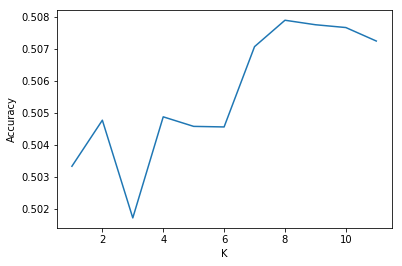

In [102]:
plt.plot(range(1,k),scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [103]:
print("The best k =", scores.argmax()+1 )

The best k = 8


In [104]:
clf_knn = KNeighborsClassifier(n_neighbors= scores.argmax()+1)
clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_test)


In [105]:
conf_knn = confusion_matrix(y_test, y_pred)
print(conf_knn)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[21808  6770]
 [21348  7211]]
              precision    recall  f1-score   support

           1       0.51      0.76      0.61     28578
           2       0.52      0.25      0.34     28559

   micro avg       0.51      0.51      0.51     57137
   macro avg       0.51      0.51      0.47     57137
weighted avg       0.51      0.51      0.47     57137

0.5078845581672121


In [ ]:
# Support Vector Machine
clf_svc = SVC(kernel='rbf')
clf_svc.fit(x_train, y_train)
y_pred = clf_svc.predict(x_test)

In [ ]:
conf_svm = confusion_matrix(y_test, y_pred)
print(conf_svm)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## Results and Discussion

We have built models on balanced as well as imbalanced data but we could not get accuracy greater than 70% in any case. Number of different models have been used to make our predictions. 
When working with unbalanced data, there were a huge amount of skewness towards the class of greater data, that is, 'SEVERITYCODE'=1. So, the models were very partial towards that class and the results were not good. 

To make the data balanced, we did it in two different ways: Under Sampling and Over Sampling.
But after making the data balanced and building our models with the balanced data, still the accuracy of prediction was not above 55%.

## Conclusion

The accuracy of models was not satisfactory in any of our case. We expected that some insight could be taken out of the data by using the features that we selected but the accuracy of models is required to be high in order to predict something with assurance. 
If a dataset is heavily unbalanced, we need to balance it as in the unbalanced data, we saw that the predictions were bound to be partial to one class.